# Aufgabenblatt 7


In [1]:
import sys
import random
print(sys.executable)
print(sys.version)
print(sys.version_info)

c:\Users\Bernhard\AppData\Local\Programs\Python\Python312\python.exe
3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
sys.version_info(major=3, minor=12, micro=6, releaselevel='final', serial=0)


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

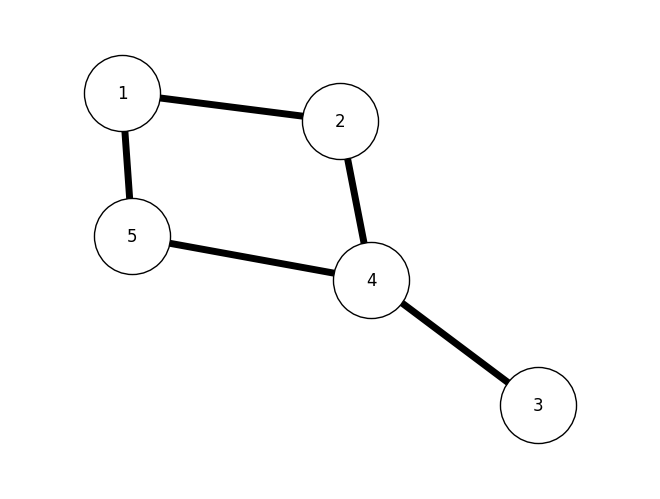

In [4]:
######Test###### 
G=nx.Graph()

G.add_node("1")
G.add_node("2")
G.add_node("3")
G.add_node("4")
G.add_node("5")

G.add_edge("1","2")
G.add_edge("5","1")
G.add_edge("4","5")
G.add_edge("3","4")
G.add_edge("2","4")


nx.draw(G,with_labels=True ,node_color="white",node_size=3000, edgecolors="black", width=5)
plt.margins(0.2)
plt.show()


# Aufgabe 7.0

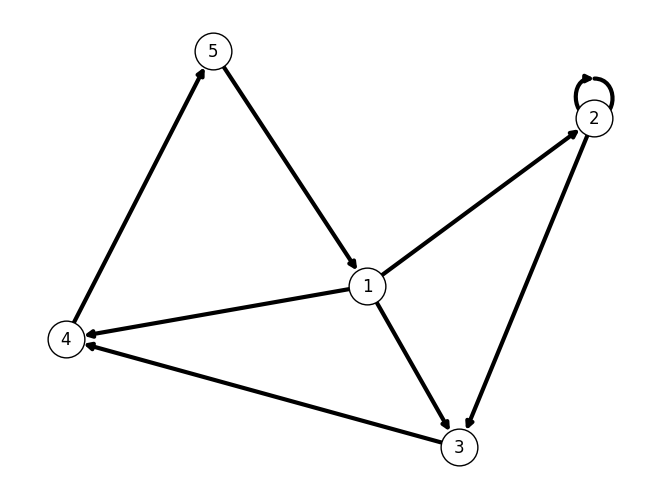

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    #a Erstellen Sie eine Methode addNode(k), die einen neuen Knoten k in den Graphen einfügt.
    #     Sollte es den Knoten bereits geben, so soll einfach nichts passieren.
    def addNode(self, k):
        if k not in self.graph:
            self.graph[k] = []

    #b Erstellen Sie eine Methode addEdge(k,j), die eine neue Kante von Knoten k nach Knoten j einfügt.
    #     Sollte einer der Knoten nicht existieren oder die Kante bereits existieren, soll nichts passieren.
    def addEdge(self, k, j):
        if k in self.graph and j in self.graph:
            if j not in self.graph[k]:
                self.graph[k].append(j)

    #b Erstellen Sie eine Methode V(), die eine Liste aller Knoten des Graphen zurückliefert.
    def V(self):
        return list(self.graph.keys()) #sorted

    #d Erstellen Sie eine Methode E(), die eine Liste aller Kanten des Graphen zurückliefert.
    #     Eine Kante besteht aus zwei Teilen: Startknoten und Zielknoten.
    def E(self):
        kante = []
        for k, nachbarn in self.graph.items():
            for j in nachbarn:
                kante.append((k, j))
        return kante

    # (e) Erstellen Sie eine Methode allSingles(), die die Liste aller Knoten zurückliefert,
    #     die keine Nachbarn haben.
    def allSingles(self):
        return [k for k, nachbarn in self.graph.items() if not nachbarn]

    # (f) Erstellen Sie eine Methode mostEdges(), die den Knoten mit den meisten Kanten zurückliefert.
    def mostEdges(self):
        return max(self.graph, key=lambda k: len(self.graph[k]), default=None)

    # (g) Erstellen Sie eine Methode neighbors(v), die eine Sequenz der Nachbarn eines Knotens zurückliefert.
    def neighbors(self, v):
        return self.graph.get(v, [])

    #Graph zeichnen lassen
    def drawGraph(self):
        G = nx.DiGraph()
        G.add_nodes_from(self.V())
        G.add_edges_from(self.E())
        nx.draw(G, with_labels=True, node_size=700, node_color='white', edgecolors="black", width=3)
        plt.show()

g = Graph()

# Knoten 1 bis 5 hinzufügen
for i in range(1, 6):
    g.addNode(i)

# Kanten 
for i, j in [(1, 2), (2, 2), (1, 3), (2, 3), (3, 4), (1, 4), (4, 5), (5, 1)]:
    g.addEdge(i, j)

# Graph zeichnen
g.drawGraph()


# Aufgabe 7.1

In [ ]:
class Cntr:
    #a Implementieren Sie den Konstruktor so, dass er einen beliebigen Sequenz-Wert ubergeben ¨
    #bekommt (etwa eine Liste, ein Tupel, ein String, ...) und daraus ein Counter-Objekt erzeugt.
    def __init__(self, seq): 
        self.counter = {}
        for item in seq:
            if item in self.counter:
                self.counter[item] += 1
            else:
                self.counter[item] = 1
    #b Implementieren Sie eine repr-Funktion, um das Objekt ausgeben zu können.
    def __repr__(self):
        return '\n'.join([f"'{k}' {v}" for k, v in sorted(self.counter.items())]) 
    
    #c Implementieren Sie eine Methode most, die das Element zurückliefert, das am häufigsten vorkommt.
    def most(self):
        return max(self.counter, key=self.counter.get) 
    
    #d Implementieren Sie die +-Operation für zwei Counter-Objekte Das Ergebnis soll ein neues Counter-Objekt sein.
    def __add__(self, other):
        result = Cntr("")
        for key in self.counter:
            result.counter[key] = self.counter.get(key, 0) + other.counter.get(key, 0)
        for key in other.counter:
            if key not in result.counter:
                result.counter[key] = other.counter[key] #fehlender sclüssel zurückgeben
        return result #gibt neues cntr objekt zurück
    
    #e  Implementieren Sie die *-Operation für zwei Counter-Objekte. Das Ergebnis soll ein neues Counter-Objekt sein.
    def __mul__(self, other): 
        result = Cntr("")
        for key in self.counter:
            result.counter[key] = self.counter.get(key, 0) * other.counter.get(key, 0) #multipliziert werte für counter der beiden schlüssel
        return result




In [5]:
#Beispiel 
print("Aufgabe b")
c = Cntr("Hallo Welt")
print(c)  
print(c.most())  
print("Aufgabe d")
c2 = Cntr("Hello World")
print(c + c2) 
print("Aufgabe e")
print(c * c2)  
print("Aufgabe c")


Aufgabe b
' '--> 1
'H'--> 1
'W'--> 1
'a'--> 1
'e'--> 1
'l'--> 3
'o'--> 1
't'--> 1
l
Aufgabe d
' '--> 2
'H'--> 2
'W'--> 2
'a'--> 1
'd'--> 1
'e'--> 2
'l'--> 6
'o'--> 3
'r'--> 1
't'--> 1
Aufgabe e
' '--> 1
'H'--> 1
'W'--> 1
'a'--> 0
'e'--> 1
'l'--> 9
'o'--> 2
't'--> 0
Aufgabe c


In [ ]:
# def __mul__(self, other): 
#         result = Cntr("")
#         for key in self.counter:
#             result.counter[key] = self.counter.get(key, 0) * other.counter.get(key, 0) #multipliziert werte für counter der beiden schlüssel
#         return result